In [1]:
"""Team name: Rocket Team,Group Members: Anıl Kırbaş, Haluk Levent Çiçek , Ali Dorukhan Karakaya
Dataset link: https://www.kaggle.com/abcsds/pokemon"""

'Team name: Rocket Team,Group Members: Anıl Kırbaş, Haluk Levent Çiçek , Ali Dorukhan Karakaya\nDataset link: https://www.kaggle.com/abcsds/pokemon'

In [75]:
"""Description: First, we will introduce the variables and instances of the dataset. We will explore the variables and their potential dependencies.
Once we have studied the variables, we will try to cluster the Pokemon. We will try to make some predictions of the variables."""

'Description: First, we will introduce the variables and instances of the dataset. We will explore the variables and their potential dependencies.\nOnce we have studied the variables, we will try to cluster the Pokemon. We will try to make some predictions of the variables.'

In [46]:
#Import Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.neighbors import KNeighborsClassifier

In [47]:
#Read csv into dataframe
data = pd.read_csv('Pokemon.csv')
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [48]:
data.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [49]:
data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [50]:
data['Name'].count()

800

In [51]:
data.shape

(800, 13)

In [52]:
data['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Dragon       32
Ghost        32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [53]:
data.groupby('Type 1').size()

Type 1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
dtype: int64

In [54]:
data.groupby('Type 1')['Legendary'].value_counts()

Type 1    Legendary
Bug       False         69
Dark      False         29
          True           2
Dragon    False         20
          True          12
Electric  False         40
          True           4
Fairy     False         16
          True           1
Fighting  False         27
Fire      False         47
          True           5
Flying    False          2
          True           2
Ghost     False         30
          True           2
Grass     False         67
          True           3
Ground    False         28
          True           4
Ice       False         22
          True           2
Normal    False         96
          True           2
Poison    False         28
Psychic   False         43
          True          14
Rock      False         40
          True           4
Steel     False         23
          True           4
Water     False        108
          True           4
Name: Legendary, dtype: int64

In [55]:
#to control data if there is a null value or not
data.isnull().values.any()

True

In [56]:
data['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [57]:
#to return number of unique elements in the object

data['Type 2'].nunique()

18

In [58]:
data.corr()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.119813,0.097614,0.102298,0.094786,0.088759,0.085817,0.010733,0.982516,0.153396
Total,0.119813,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.097614,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102298,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094786,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.088759,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085817,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.010733,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.982516,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.153396,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


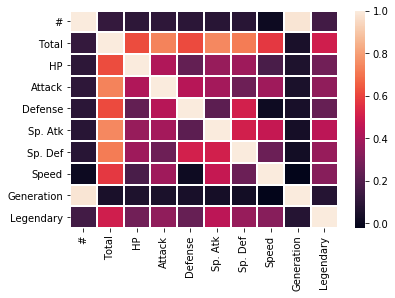

In [59]:
#to see the frequency of attributes
sns.heatmap(data.corr(), linewidths=1)

In [61]:
#renaming column names
# "#" is set as an index and attributes are renamed
data.columns = ['#','Name','Type1', 'Type2','Total' ,'HP', 'Attack','Defense','Sp.Atk','Sp.Def','Speed', 'Generation', 'Legendary']
data = data.set_index('#')



In [62]:
data.head()

,Name,Type1,Type2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [36]:
#to remove unnecessary texts, firstly, we should see the original texts
data.head(10)

,Name,Type1,Type2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [37]:
data.tail(10)

,Name,Type1,Type2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False
715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False
716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True
717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [41]:
#now we can see the unnecessary texts, so we should remove them
import re
data.Name = data.Name.apply(lambda x: re.sub(r'(.+)(Mega.+)',r'\2',x))
data.Name = data.Name.apply(lambda x: re.sub(r'(.+)(Primal.+)',r'\2',x))
data.Name = data.Name.apply(lambda x: re.sub(r'(HoopaHoopa)(.+)','Hoopa'+r'\2',x))

In [39]:
data.head(10)

,Name,Type1,Type2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
6,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
6,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [40]:
data.tail(10)

,Name,Type1,Type2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False
715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False
716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True
717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,Mega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,Hoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
720,Hoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [42]:
#we can do filtering operation according to the attributes
#in this case, filtering operation is done according to not being mega and not being primal in name
new = data.loc[(data['Name'].str.contains('Mega ') == False) & (data['Name'].str.contains('Primal')==False)]
new.head(10)

,Name,Type1,Type2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False


In [43]:
#filtering is done according to attack points which is greater than 100
new[new['Attack']>100].head(10)

,Name,Type1,Type2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
34,Nidoking,Poison,Ground,505,81,102,77,85,75,85,1,False
57,Primeape,Fighting,NaN,455,65,105,60,60,70,95,1,False
59,Arcanine,Fire,NaN,555,90,110,80,100,80,95,1,False
68,Machamp,Fighting,NaN,505,90,130,80,65,85,55,1,False
71,Victreebel,Grass,Poison,490,80,105,65,100,70,70,1,False
76,Golem,Rock,Ground,495,80,120,130,55,65,45,1,False
85,Dodrio,Normal,Flying,460,60,110,70,60,60,100,1,False
89,Muk,Poison,NaN,500,105,105,75,65,100,50,1,False
98,Krabby,Water,NaN,325,30,105,90,25,25,50,1,False


In [44]:
#now, filtering is done according to legengary pokemons
new[new['Legendary'] == True].head(10)

,Name,Type1,Type2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
243,Raikou,Electric,NaN,580,90,85,75,115,100,115,2,True
244,Entei,Fire,NaN,580,115,115,85,90,75,100,2,True
245,Suicune,Water,NaN,580,100,75,115,90,115,85,2,True
249,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True
250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True


In [63]:
#we can seperate pokemons for being legendary ones and others
Poke = new.loc[(new['Legendary']==False)] #Without Legendary Pokes
PokeL = new.loc[(new['Legendary']==True)] #With Legendary Pokes

PokeL

,Name,Type1,Type2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
243,Raikou,Electric,NaN,580,90,85,75,115,100,115,2,True
244,Entei,Fire,NaN,580,115,115,85,90,75,100,2,True
245,Suicune,Water,NaN,580,100,75,115,90,115,85,2,True
249,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True
250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True


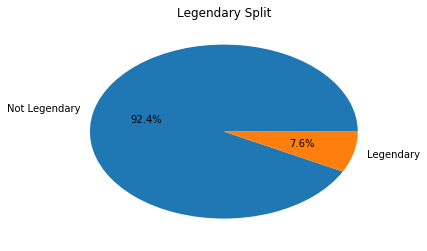

In [64]:
#we can see the distribution of pokemons in charts. 
LSplit = [Poke['Name'].count(),PokeL['Name'].count()]

LegendPie = plt.pie(LSplit,labels= ['Not Legendary', 'Legendary'], autopct ='%1.1f%%')


plt.title('Legendary Split')

fig = plt.gcf()

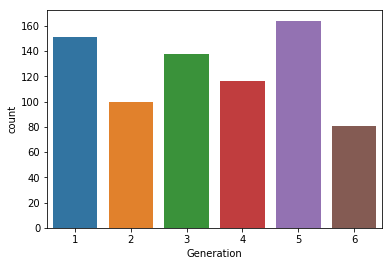

In [66]:
#number of pokemon generations
sns.countplot(x='Generation', data=new);

In [67]:
#we can divide pokemons into different dataframes for each different generation
Gen1 = Poke.loc[Poke['Generation'] == 1]
Gen2 = Poke.loc[Poke['Generation'] == 2]
Gen3 = Poke.loc[Poke['Generation'] == 3]
Gen4 = Poke.loc[Poke['Generation'] == 4]
Gen5 = Poke.loc[Poke['Generation'] == 5]
Gen6 = Poke.loc[Poke['Generation'] == 6]

print(Gen1.head())
print(Gen2.head())
print(Gen3.head())
print(Gen4.head())
print(Gen5.head())
print(Gen6.head())

         Name  Type1   Type2  Total  HP  Attack  Defense  Sp.Atk  Sp.Def  \
#                                                                          
1   Bulbasaur  Grass  Poison    318  45      49       49      65      65   
2     Ivysaur  Grass  Poison    405  60      62       63      80      80   
3    Venusaur  Grass  Poison    525  80      82       83     100     100   
4  Charmander   Fire     NaN    309  39      52       43      60      50   
5  Charmeleon   Fire     NaN    405  58      64       58      80      65   

   Speed  Generation  Legendary  
#                                
1     45           1      False  
2     60           1      False  
3     80           1      False  
4     65           1      False  
5     80           1      False  
          Name  Type1 Type2  Total  HP  Attack  Defense  Sp.Atk  Sp.Def  \
#                                                                         
152  Chikorita  Grass   NaN    318  45      49       65      49      65   
153 

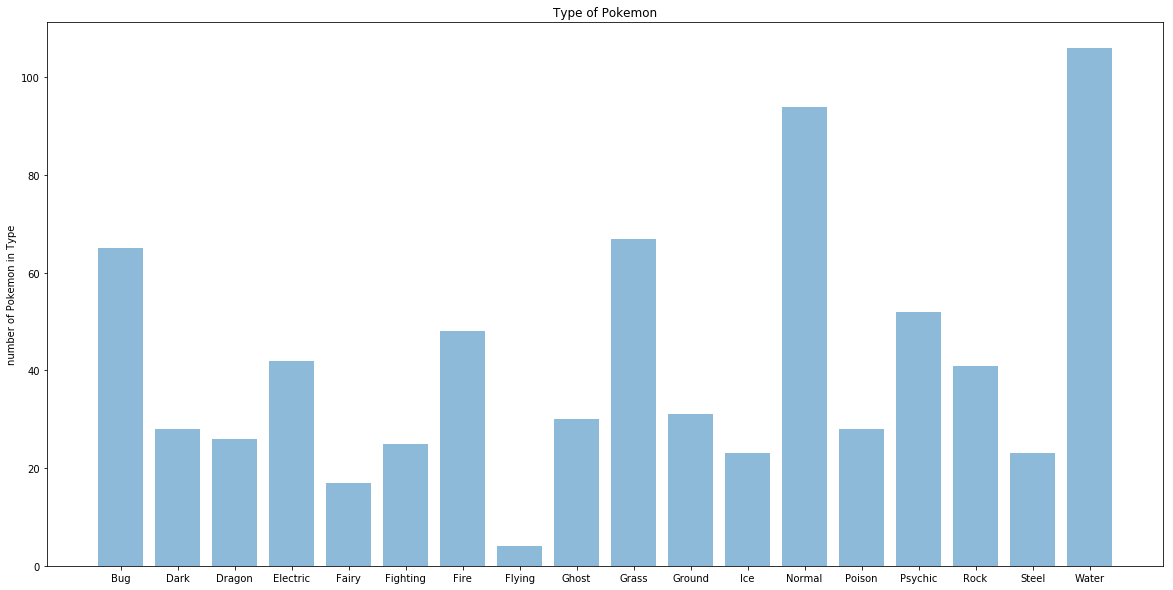

In [68]:
#we can see the number of pokemon's types
group = new.groupby('Type1')

tip = group.groups.keys()
num = group.size()
y_pos = np.arange(len(num))

plt.figure(figsize=(20,10))
plt.bar(y_pos, num, align='center', alpha=0.5)
plt.xticks(y_pos, tip)
plt.ylabel('number of Pokemon in Type')
plt.title('Type of Pokemon')
 
plt.show()

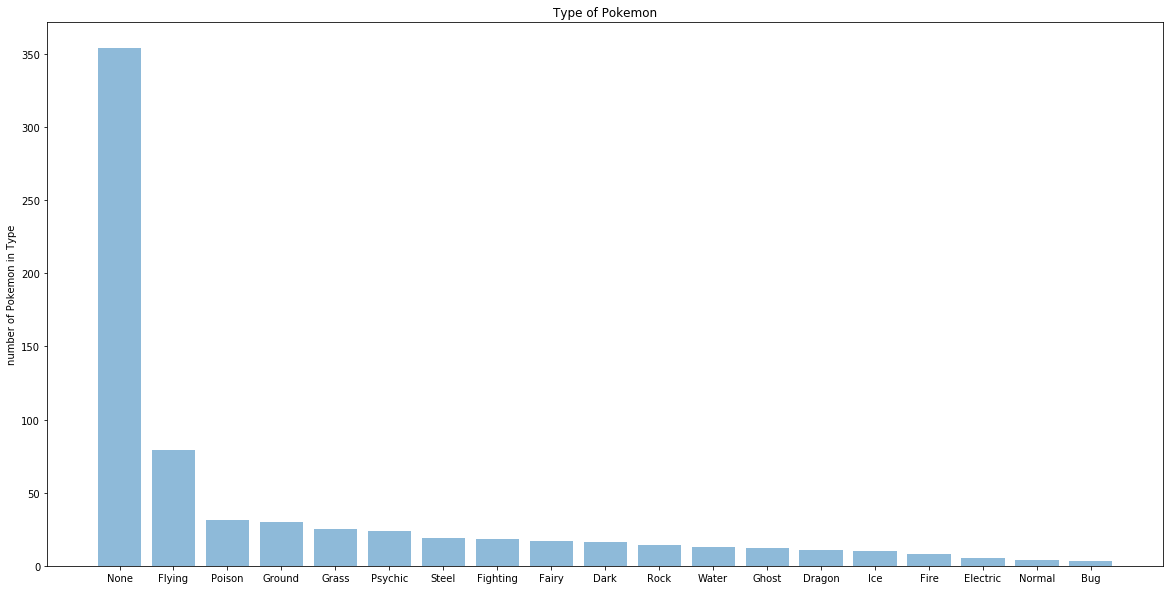

In [69]:
#also, we can find the distribution of Type2 pokemons

for row in Poke.loc[Poke.Type2.isnull(), 'Type2'].index:
    Poke.at[row, 'Type2'] = 'None'
    
tip2 = pd.value_counts(Poke['Type2'])
plt.figure(figsize=(20,10))
plt.bar(tip2.index, tip2, align='center', alpha=0.5)
plt.ylabel('number of Pokemon in Type')
plt.title('Type of Pokemon')
 
plt.show()